In [11]:
#@title Установка нужных версий библиотек
!wget 'https://drive.google.com/uc?export=download&id=1oSFOP0j25OZAuhD8YXxyQXNTdr2lUdtn' -O requirements.txt
!pip install -r requirements.txt

"wget" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.
"id" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


# Суть модели *K* ближайших соседей

## KNN для классификации

Начнем обсуждение с алгоритма kNN для задачи классификации. Расшифровывается его название как _"k ближайших соседей (k nearest neighbours)"_.

На изображении показано два класс (синие квадраты и красные треугольники), а в центре находится неопределившийся объект - зеленый круг, вот для него то и будем искать ближайших соседей.

 <img src='https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png'>

 При инициализации алгоритмы KNN нужно указывать, на какое количество соседей вы хотите опираться, на изображении опираемся на трех ближайших соседей и видим, что два соседа имеют красный класс, а один сосед - синий класс, значит по большинству побеждает красный класс. И новый объект, зеленый круг, будет классифицирован, как красный треугольник.  

Модель очень ленивая, ведь вся суть её обучения сводится к запоминанию объектов из обучающей выборки.

Давайте обучим модель KNN из `sklearn` на сгенерированных данных.

Сгенерируем два класса с помощью функции `make_classification`.

In [17]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=110, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=2, random_state=6)

display(X, y)

array([[-1.71435607,  1.05793305],
       [ 1.22308043, -2.2635163 ],
       [-0.74339553, -0.82836749],
       [-3.10114999,  0.55737705],
       [-1.25272785, -1.99962916],
       [ 1.295549  , -0.90585939],
       [-0.39121512,  1.30843756],
       [-2.29436606, -0.32114685],
       [-0.37326143, -1.5106069 ],
       [ 0.84350362,  0.03804169],
       [-1.23337772,  0.62869299],
       [-0.51595847, -1.69033762],
       [ 0.11293492, -1.46417755],
       [ 0.39978471, -1.3120226 ],
       [-2.49684085, -0.0139064 ],
       [ 1.19899006,  1.27323302],
       [-1.84733371,  1.17918884],
       [-1.68009315,  0.94130391],
       [ 2.6400623 , -0.13810078],
       [-1.8453037 ,  0.96321745],
       [-0.71170663,  0.71554382],
       [-0.02934338, -1.59054511],
       [ 1.23158511,  1.36757795],
       [ 1.72196418, -0.7425116 ],
       [ 1.5719743 , -3.17595646],
       [ 0.14132289, -1.44743003],
       [ 1.80872881, -0.63583078],
       [ 1.79510491, -0.69260501],
       [ 0.07462334,

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0])

Разобьем выборку на обучение и тест с помощью `train_test_split`.

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=10)
X_train.shape, X_test.shape

((100, 2), (10, 2))

И отрисуем полученные точки, синие - это один класс, оранжевые - это второй класс, а вот зеленые звезды - это тестовые точки, для них будет искать ближайших соседей.

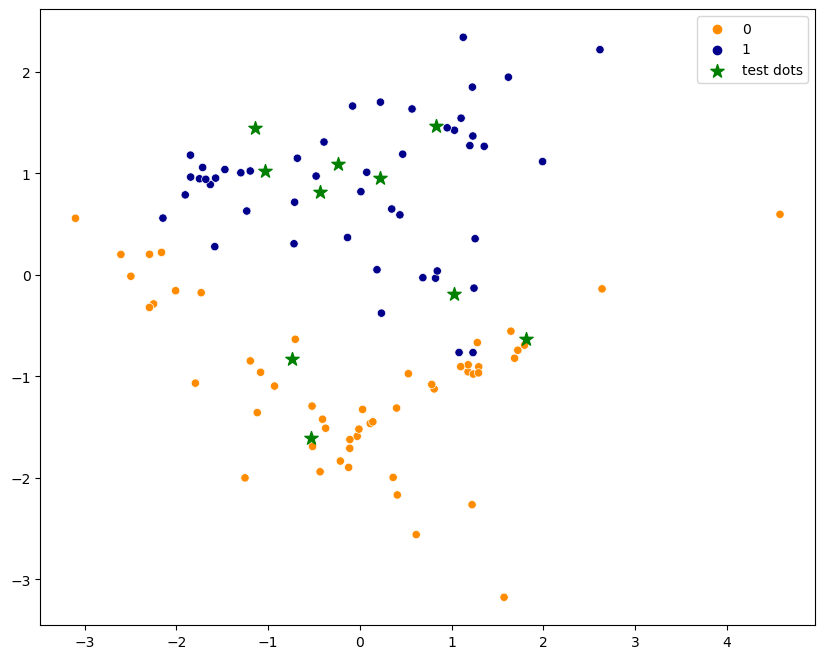

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Create color maps
cmap_bold = ["darkorange", "darkblue"]

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_train[:, 0],
    y=X_train[:, 1],
    hue=y_train,
    palette=cmap_bold
)

plt.scatter(X_test[:, 0], X_test[:, 1], c='g', marker='*', s=100, label='test dots')
plt.legend();

### Обучение KNN

Инициализируем модель `KNeighborsClassifier` для задачи классификации из `sklearn`.

In [28]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 3
model = KNeighborsClassifier(n_neighbors=n_neighbors)

И обучаем на обучающей выборке.

При этом помним, что никакого обучения нет, модель просто сохраняет выборку.

In [29]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Предсказание KNN

И теперь можем сделать предсказания для наших тестовых объектов.

In [30]:
pred_test = model.predict(X_test)
pred_test

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1])

И посмотрим, насколько предсказанные классы похожи на правду.

In [31]:
display(pred_test, y_test)

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1])

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1])

А они прям идеально совпадают, значит действительно посмотреть на ближайших соседей и принять решения, а какого класса будет объект - очень разумно.

#### Детали получения предсказания в KNN

А давайте увидем ближайших соседей для пары тестовых объектов.

Для этого
1. пройдемся по всем обучающим объектам
2. посчитаем Эвклидово расстояние (ведь именно оно и считается по умолчанию в KNN в `sklearn`) через `numpy.linalg.norm`.

In [37]:
import numpy as np
import pandas as pd


idx = 0
test_dot = X_test[idx]

distances = pd.DataFrame()
for i, train_dot in enumerate(X_train):  # 1
    distances = distances._append({
        'train_idx': i,
        'dst': np.linalg.norm(train_dot - test_dot, ord=2)  # 2
    }, ignore_index=True)

И после подсчета всех расстояний от тестового объекта до обучающих объектов мы берем наиближайших, тех у которых расстояние меньше всех.

И возьмем только 3 соседей.

In [38]:
distances.sort_values('dst').head(n_neighbors)

,train_idx,dst
40,40.0,0.159445
41,41.0,0.262930
15,15.0,0.375908


И получим их индексы для дальнейшей отрисовки.

In [39]:
nearest_neigbors_idxs = distances.sort_values('dst').head(n_neighbors).index
nearest_neigbors_idxs

Index([40, 41, 15], dtype='int64')

Отрисовываем три найденных соседа в полупрозрачные зеленые окружности.

И видим, что действительно, эти три объекта самые близкие для данного тестового объекта и они все синего цвета, а значит по большинству побеждает именно синий класс.

In [48]:
idx = 9
test_dot = X_test[idx]

distances = pd.DataFrame()
for i, train_dot in enumerate(X_train):  # 1
    distances = distances._append({
        'train_idx': i,
        'dst': np.linalg.norm(train_dot - test_dot, ord=2)  # 2
    }, ignore_index=True)

distances.sort_values('dst').head(n_neighbors)

,train_idx,dst
95,95.0,0.154511
96,96.0,0.251004
35,35.0,0.334685


И получае индексы для отрисовки.

In [49]:
nearest_neigbors_idxs = distances.sort_values('dst').head(n_neighbors).index
nearest_neigbors_idxs

Index([95, 96, 35], dtype='int64')

Отрисовываем три найденных соседа в полупрозрачные зеленые окружности.

И снова, эти три объекта самые близкие к тестовому объекту, а вот они все имеют метку оранжевого класса, а значит наш тестовый объект тоже приобретет метку "оранжевый класс".

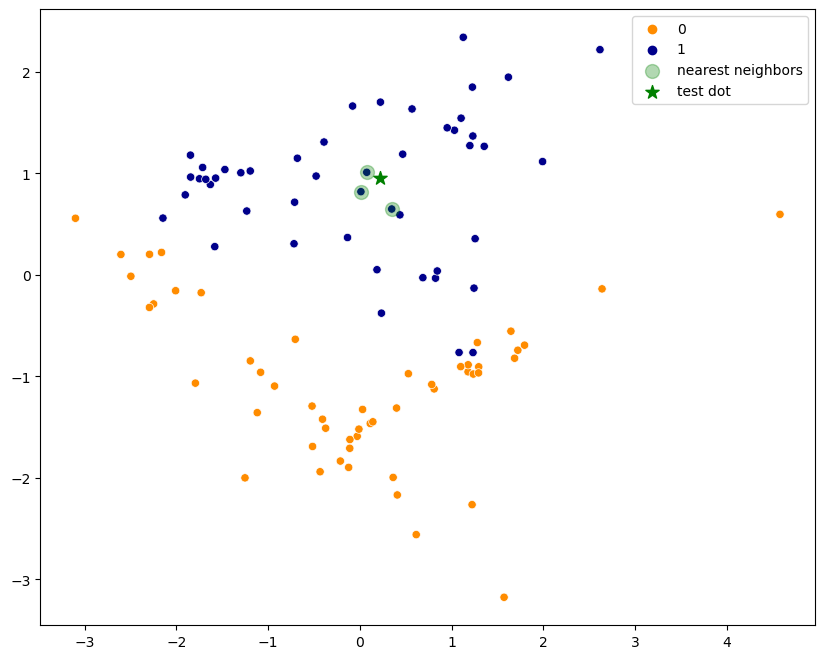

In [50]:
# Create color maps
cmap_bold = ["darkorange", "darkblue"]

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_train[:, 0],
    y=X_train[:, 1],
    hue=y_train,
    palette=cmap_bold
)

plt.scatter(X_train[nearest_neigbors_idxs, 0], X_train[nearest_neigbors_idxs, 1],
            c='g', alpha=0.3, marker='o', s=100, label='nearest neighbors')

plt.scatter(X_test[idx, 0], X_test[idx, 1], c='g', marker='*', s=100, label='test dot')
plt.legend();

### Резюме KNN

В этом и кроется вся суть алгоритма KNN.

На **моменте обучения** ничего интересного не происходит: все точки из обучения попросту запоминаются.

На **моменте предсказания** происходят более интересные вещи:
1. для тестовой точки считаем расстояния до всех точек с обучения
2. сортируем от самого ближнего до самого дальнего расстояния
3. делаем голосование между классами ближайших $N$ соседей - это и есть предсказанная метка класса

## KNN для регрессии

А теперь давайте обсудим отличия KNN для классификации от KNN для регрессии.

Давайте обучим модель KNN для регресии из `sklearn` на сгенерированных данных.

Сгенерируем 110 объектов с помощью функции `make_regression`.

In [ ]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=110, n_features=2, n_informative=2,
                       random_state=6)

display(X, y)

array([[ 0.78263039, -0.49341854],
       [-0.18765745, -1.4863921 ],
       [ 1.63929108, -0.4298936 ],
       [ 0.35480861,  1.81259031],
       [-2.12647459,  0.75144883],
       [ 1.56448966,  0.71270509],
       [ 0.65725757, -0.47237563],
       [ 0.07409773,  2.03076035],
       [-0.12673638, -1.36861282],
       [-0.46550831,  0.23371059],
       [-1.22257572,  0.8228126 ],
       [ 0.11660197, -0.68225732],
       [ 0.64330145, -0.44789505],
       [-0.53070072,  1.13694227],
       [ 0.17365335, -1.03543429],
       [-0.96813764,  0.16706673],
       [-0.33588161,  1.23773784],
       [ 1.21848065, -0.85750144],
       [ 0.17629034,  1.09462041],
       [-0.50426698,  1.05250993],
       [-0.04723705, -1.44903979],
       [ 1.46901739,  1.74951635],
       [-0.03618977, -0.09084699],
       [ 0.82465384, -1.17643148],
       [-0.47144628,  2.33660781],
       [ 0.11444143, -0.02195668],
       [-0.06009261, -0.56848829],
       [ 0.31508564, -1.0146655 ],
       [-0.05961756,

array([ -10.66244648,  -92.07211428,   13.26158326,  115.24501892,
         -5.77482665,   78.87831107,  -12.37461469,  121.49849425,
        -83.69176519,    2.81713379,   19.72411478,  -37.48598927,
        -11.25972977,   54.54481088,  -56.96890099,  -12.9518793 ,
         65.07750333,  -21.86615914,   68.70174093,   50.18849411,
        -86.56196733,  137.7699071 ,   -6.20963507,  -49.94963378,
        126.68433272,    1.40080308,  -34.93897749,  -52.41284413,
         10.04578784,  -11.13189271,  -29.61021615,   97.11972486,
        -92.67858277,   71.76516307,   10.23353984,   73.10728639,
         35.64526282,  -55.44024142,  -99.30796032,  -29.72429363,
        -41.20631185,    9.81536928,  -95.31048751,    0.28292736,
         18.07617282,  -49.30635516,  -74.17129949,  -28.4343354 ,
        -34.66741029,   58.26901278,   74.61692388,   39.03528174,
         49.5828809 ,   -7.59293348,  -42.52180903,   66.94943122,
         -1.49989836,  -30.176389  ,   48.46334221,   44.36209

Разобьем выборку на обучение и тест с помощью `train_test_split`.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=10)
X_train.shape, X_test.shape

((100, 2), (10, 2))

И отрисуем полученные точки, раскрасим их в зависимости от целевого значения, если точка более яркая, то значит у неё большое целевое значение, если точка более блеклая, то и целевое значение меньше.

А зеленые звезды - это тестовые точки, для них будет искать ближайших соседей.

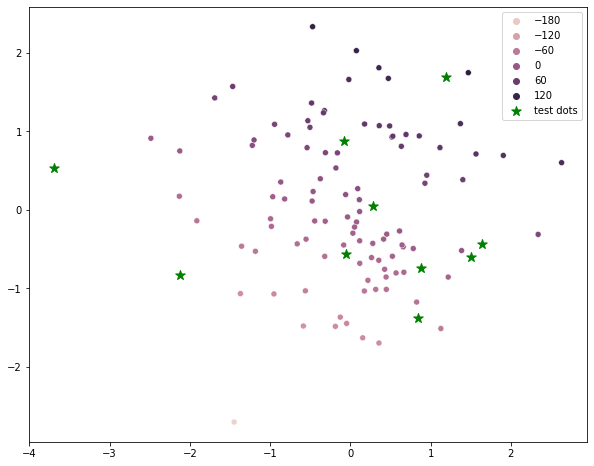

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_train[:, 0],
    y=X_train[:, 1],
    hue=y_train
)

plt.scatter(X_test[:, 0], X_test[:, 1], c='g', marker='*', s=100, label='test dots')
plt.legend();

### Обучение KNN

Инициализируем модель `KNeighborsRegressor` для задачи регрессии из `sklearn`.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

n_neighbors = 3
model = KNeighborsRegressor(n_neighbors=n_neighbors)

И обучаем на обучающей выборке.

Никакого обучения здесь нет, на самом деле, модель просто сохраняет выборку.

In [ ]:
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

### Предсказание KNN

И теперь можем сделать предсказания для наших тестовых объектов.

In [ ]:
pred_test = model.predict(X_test)
pred_test

array([-53.99812541, -25.33424853, -28.83554665, -10.18245823,
        47.79409516, 114.96770525, -16.82251686,   9.90350525,
         5.5775676 , -69.31157808])

И посмотрим, насколько предсказанные классы похожи на правду.

In [ ]:
display(pred_test, y_test)

array([-53.99812541, -25.33424853, -28.83554665, -10.18245823,
        47.79409516, 114.96770525, -16.82251686,   9.90350525,
         5.5775676 , -69.31157808])

array([-61.56318468, -23.01956535, -34.93897749,   0.28292736,
        49.5828809 , 127.67174326, -55.44024142,   9.81536928,
        13.26158326, -99.30796032])

Они конечно совпадают неидеально, но в целом они имеют близкие значения.

#### Детали получения предсказания в KNN

А давайте увидем ближайших соседей для пары тестовых объектов.

Для этого
1. пройдемся по всем обучающим объектам
2. посчитаем Эвклидово расстояние (ведь именно оно и считается по умолчанию в KNN в `sklearn`) через `numpy.linalg.norm`.

In [ ]:
import numpy as np
import pandas as pd


idx = 0
test_dot = X_test[idx]

distances = pd.DataFrame()
for i, train_dot in enumerate(X_train):  # 1
    distances = distances.append({
        'train_idx': i,
        'dst': np.linalg.norm(train_dot - test_dot, ord=2)  # 2
    }, ignore_index=True)

И после подсчета всех расстояний от тестового объекта до обучающих объектов мы берем наиближайших, тех у которых расстояние меньше всех.

И возьмем только 3 соседей.

In [ ]:
distances.sort_values('dst').head(n_neighbors)

,dst,train_idx
60,0.202009,60.0
34,0.320839,34.0
32,0.532766,32.0


И получим их индексы для дальнейшей отрисовки.

In [ ]:
nearest_neigbors_idxs = distances.sort_values('dst').head(n_neighbors).index
nearest_neigbors_idxs

Int64Index([60, 34, 32], dtype='int64')

Отрисовываем три найденных соседа в полупрозрачные зеленые окружности.

И видим, что действительно, эти три объекта самые близкие для данного тестового объекта и они имеют свои три целевых значения.

Чтобы получить предсказания для тестового объекта, нужно усреднить целевые значения ближайших соседей.

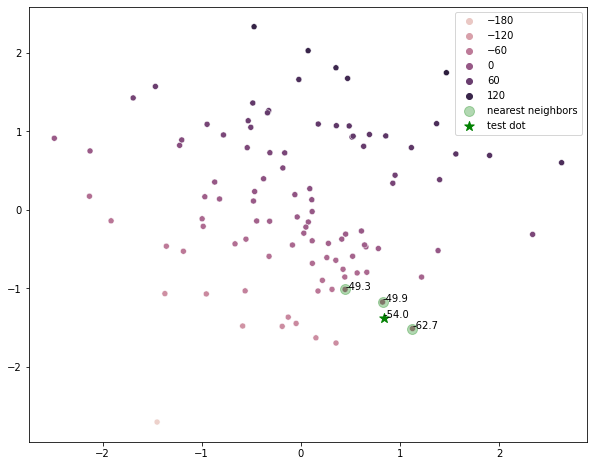

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_train[:, 0],
    y=X_train[:, 1],
    hue=y_train,
)

plt.scatter(X_train[nearest_neigbors_idxs, 0], X_train[nearest_neigbors_idxs, 1],
            c='g', alpha=0.3, marker='o', s=100, label='nearest neighbors')

pred = np.mean(y_train[nearest_neigbors_idxs])
plt.scatter(X_test[idx, 0], X_test[idx, 1], c='g', marker='*', s=100, label='test dot')
plt.annotate(round(pred, 1), (X_test[idx, 0], X_test[idx, 1]))

for i, txt in enumerate(y_train[nearest_neigbors_idxs]):
    plt.annotate(round(txt, 1), (X_train[nearest_neigbors_idxs[i], 0], X_train[nearest_neigbors_idxs[i], 1]))

plt.legend();

А давайте возьмем еще один тестовый объект и сделаем для него точно такие же действия.

In [ ]:
idx = 8
test_dot = X_test[idx]

distances = pd.DataFrame()
for i, train_dot in enumerate(X_train):  # 1
    distances = distances.append({
        'train_idx': i,
        'dst': np.linalg.norm(train_dot - test_dot, ord=2)  # 2
    }, ignore_index=True)

distances.sort_values('dst').head(n_neighbors)

,dst,train_idx
54,0.269626,54.0
53,0.599942,53.0
17,0.709386,17.0


И получае индексы для отрисовки.

In [ ]:
nearest_neigbors_idxs = distances.sort_values('dst').head(n_neighbors).index
nearest_neigbors_idxs

Int64Index([54, 53, 17], dtype='int64')

Отрисовываем три найденных соседа в полупрозрачные зеленые окружности.

И снова, эти три объекта самые близкие к тестовому объекту.

А чтобы получить предсказание для звездочки, нужно усреднить их предсказанные целевые значения.

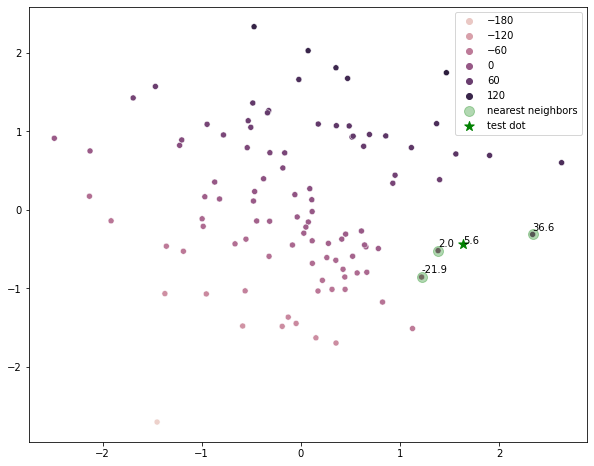

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_train[:, 0],
    y=X_train[:, 1],
    hue=y_train,
)

plt.scatter(X_train[nearest_neigbors_idxs, 0], X_train[nearest_neigbors_idxs, 1],
            c='g', alpha=0.3, marker='o', s=100, label='nearest neighbors')

pred = np.mean(y_train[nearest_neigbors_idxs])
plt.scatter(X_test[idx, 0], X_test[idx, 1], c='g', marker='*', s=100, label='test dot')
plt.annotate(round(pred, 1), (X_test[idx, 0], X_test[idx, 1]))

for i, txt in enumerate(y_train[nearest_neigbors_idxs]):
    plt.annotate(round(txt, 1), (X_train[nearest_neigbors_idxs[i], 0], X_train[nearest_neigbors_idxs[i], 1] + 0.05))

plt.legend();

### Резюме KNN

С моделью для задачи регрессии всё тоже самое:

На **моменте обучения** ничего интересного не происходит: все точки из обучения попросту запоминаются.

На **моменте предсказания**:
1. для тестовой точки считаем расстояния до всех точек с обучения
2. сортируем от самого ближнего до самого дальнего расстояния
3. делаем усреднение целевых значений ближайших $N$ соседей - это и есть предсказание модели

## Как выбрать оптимальное количество соседей

А здесь нет четкого алгоритма, как нужно действовать, чтобы найти самое лучшее количество соседей, главное, не бросаться в крайности и смотреть на качество предсказания модели.


### Слишком мало соседей

Если взять слишком мало ближайших соседей (N < 3), то на предсказания могут влиять выбросные  объекты, либо предсказания вообще могут оказаться случайными.

Возьмем только одного ближайшего соседа.

In [ ]:
n_neighbors = 1

nearest_neigbors_idxs = distances.sort_values('dst').head(n_neighbors).index
nearest_neigbors_idxs

Int64Index([54], dtype='int64')

И отрисуем его целевое значение и предсказание для тестового объекта.

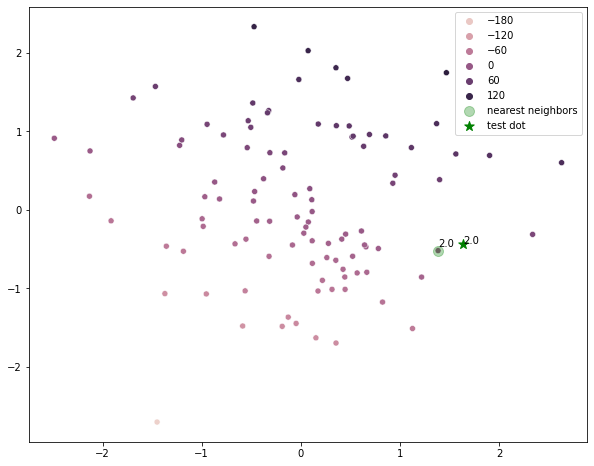

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_train[:, 0],
    y=X_train[:, 1],
    hue=y_train,
)

plt.scatter(X_train[nearest_neigbors_idxs, 0], X_train[nearest_neigbors_idxs, 1],
            c='g', alpha=0.3, marker='o', s=100, label='nearest neighbors')

pred = np.mean(y_train[nearest_neigbors_idxs])
plt.scatter(X_test[idx, 0], X_test[idx, 1], c='g', marker='*', s=100, label='test dot')
plt.annotate(round(pred, 1), (X_test[idx, 0], X_test[idx, 1]))

for i, txt in enumerate(y_train[nearest_neigbors_idxs]):
    plt.annotate(round(txt, 1), (X_train[nearest_neigbors_idxs[i], 0], X_train[nearest_neigbors_idxs[i], 1] + 0.05))

plt.legend();

### Слишком много соседей

А если взять слишком большое количество ближайших соседей для задачи, то предсказания будут сильно усредненными, все объекты могут влиять на предсказания нового объекта.

Возьмем 50 соседей, половина нашей выборки.

In [ ]:
n_neighbors = 50

nearest_neigbors_idxs = distances.sort_values('dst').head(n_neighbors).index
nearest_neigbors_idxs

Int64Index([54, 53, 17, 55, 89, 31, 68, 25, 38, 18, 60, 23,  1, 80, 43, 49, 20,
            34, 15,  0, 13, 70, 32, 12, 14,  6, 21, 63, 50, 67, 85, 66, 72, 58,
            11, 75, 33, 83,  8, 37, 76, 44, 61,  9, 40, 48, 19, 95, 39, 46],
           dtype='int64')

И отрисуем, выходит, что каждый второй влияет на предсказание нового объекта.

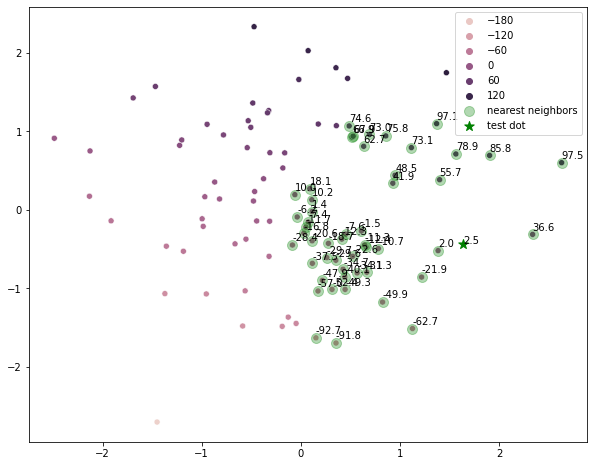

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_train[:, 0],
    y=X_train[:, 1],
    hue=y_train,
)

plt.scatter(X_train[nearest_neigbors_idxs, 0], X_train[nearest_neigbors_idxs, 1],
            c='g', alpha=0.3, marker='o', s=100, label='nearest neighbors')

pred = np.mean(y_train[nearest_neigbors_idxs])
plt.scatter(X_test[idx, 0], X_test[idx, 1], c='g', marker='*', s=100, label='test dot')
plt.annotate(round(pred, 1), (X_test[idx, 0], X_test[idx, 1]))

for i, txt in enumerate(y_train[nearest_neigbors_idxs]):
    plt.annotate(round(txt, 1), (X_train[nearest_neigbors_idxs[i], 0], X_train[nearest_neigbors_idxs[i], 1] + 0.05))

plt.legend();

Поэтому есть модификация - взвешенный KNN, про него могу рассказать в другом занятии.


## Практика
Практика будет доступна на платформе boosty https://boosty.to/machine_learrrning/posts/1d23121a-15d8-4561-ac0b-0bb456969b37

Доступна
1. по подписке уровня light+ и выше
2. разовая оплата


## Summary

Вот мы и разобрались, как обучается модель K ближайших соседей.

1. Модель и для регрессии, и для классификации **обучается** одинаково - **никак**, она запоминает обучающую выборку.
2. Затем поступает тестовый объект и нужно сделать предсказание
    - Считаем **расстояния до** всех объектов с **обучения**
    - Выбираем **K** ближайших
    - И в зависимости от задачи выдаем финальное предсказание
        1. ***Классификация***
            - Делаем **голосование** между соседами, за какой класс больше голосов, то и выбираем
        2. ***Регрессия***
            - Далем **усреденение** всех целевых значений

**Муррр** ♥